In [121]:
'''
Big Mart Sales
Lachandra Ash
10/27/2022
'''

'\nBig Mart Sales\nLachandra Ash\n10/27/2022\n'

In [122]:
#Import the neccessary libraries and modules.
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import xgboost as xgb
warnings.filterwarnings('ignore')
%matplotlib inline

In [123]:
#Import the train BigMart dataset.
traindf = pd.read_csv(('train_BigMart.csv'))
traindf.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [124]:
#Import the test BigMart dataset.
testdf = pd.read_csv(('test_BigMart.csv'))
testdf.head()

,item_identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,outlet_identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [125]:
#Display the null values.
traindf.isnull()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [126]:
#Display the null values.
testdf.isnull()

,item_identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,outlet_identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,True,False,False
5679,False,False,False,False,False,False,False,False,True,False,False


In [127]:
#Display the sum of the null values.
traindf.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [128]:
#Display the sum of the null values.
testdf.isnull().sum()

item_identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
outlet_identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [129]:
#Treat the null values.
Missing = traindf.isnull().sum()
tot_per = (Missing.sum()/traindf.shape[0]) * 100
#Print the total percentage of the missing data.
print(f'The total percentage of missing data is {round(tot_per,2)}%')

The total percentage of missing data is 45.44%


In [130]:
#Display the total percentage of missing data.
tot = traindf.isnull().sum().sort_values(ascending=False)
per_tot = (traindf.isnull().sum()/traindf.isnull().count()).sort_values(ascending=False)*100
miss = pd.concat([tot, per_tot], axis=1, keys=["Total", "Percentage"])
miss_data = miss[miss['Total']>0]
miss_data

,Total,Percentage
outlet_size,2410,28.276428
item_weight,1463,17.165317


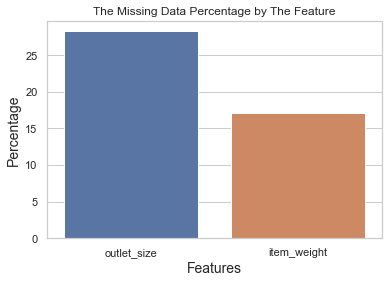

In [131]:
#Display the percentage of the values that are missing plot.
sns.barplot(x=miss_data.index, y=miss_data['Percentage'], data = miss_data)
sns.set(style="whitegrid")
plt.title('The Missing Data Percentage by The Feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [132]:
#Display the category mean of the traindf dataset.
Cat_mean = traindf.groupby('item_type')['item_weight'].mean()
for i in range(len(Cat_mean)):
#Display the s.index[i], Cat_mean[i]
    c1 = (traindf['item_type']==Cat_mean.index[i])&(traindf['item_weight'].isna()==True)
    traindf['item_weight'] = np.select([c1], [Cat_mean[i]], traindf['item_weight'] )

In [133]:
#Treat the null values.
Missing = testdf.isnull().sum()
tot_per = (Missing.sum()/testdf.shape[0]) * 100
#Display the total percentage of the missing data.
print(f'The total percentage of missing data is {round(tot_per,2)}%')

The total percentage of missing data is 45.45%


In [134]:
#Display the total percentage of missing data.
tot = testdf.isnull().sum().sort_values(ascending=False)
per_tot = (testdf.isnull().sum()/testdf.isnull().count()).sort_values(ascending=False)*100
miss = pd.concat([tot, per_tot], axis=1, keys=["Total", "Percentage"])
miss_data = miss[miss['Total']>0]
miss_data

,Total,Percentage
Outlet_Size,1606,28.269671
Item_Weight,976,17.180074


In [135]:
#Fill the missing values with a 0.
traindf.fillna(0)
traindf.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [136]:
#Fill the missing values with a 0.
testdf.fillna(0)
testdf.head()

,item_identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,outlet_identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [137]:
# Performing the treatment for the null values in the outlet_size feature in the train dataset.
from statistics import mode
traindf['outlet_size'].fillna(mode(traindf['outlet_size']),inplace=True)

In [138]:
#Check for the null value treatment of the train dataset.

print('Null values in traindf[item_weight] : ',  traindf['item_weight'].isna().sum())
print('Null values in traindf[outlet_size] : ',  traindf['outlet_size'].isna().sum())

Null values in traindf[item_weight] :  0
Null values in traindf[outlet_size] :  0


In [139]:
#Data Exploration

In [140]:
#Display the info of the traindf dataframe.
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                8523 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                8523 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [141]:
#Display the info of the traindf dataframe.
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   outlet_identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [142]:
#Display the traindf shape.
traindf.shape

(8523, 12)

In [143]:
#Display the shape of the testdf.
testdf.shape

(5681, 11)

In [144]:
#Display the description of the train dataframe. 
traindf.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [145]:
#Display the description of the test dataframe.
testdf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [146]:
#Display the index of the train dataset
traindf.index

RangeIndex(start=0, stop=8523, step=1)

In [147]:
#Display the index of the test dataset
testdf.index

RangeIndex(start=0, stop=5681, step=1)

In [148]:
#Display the dtypes of the dataframe.
traindf.dtypes

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type          object
outlet_type                   object
item_outlet_sales            float64
dtype: object

In [149]:
#Display the dtypes of the dataframe.
testdf.dtypes

item_identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
outlet_identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [150]:
#Display the sum of the traindf dataframe
traindf.sum()

item_identifier              FDA15DRC01FDN15FDX07NCD19FDP36FDO10FDP10FDH17F...
item_weight                                                      109587.796514
item_fat_content             Low FatRegularLow FatRegularLow FatRegularRegu...
item_visibility                                                     563.643281
item_type                    DairySoft DrinksMeatFruits and VegetablesHouse...
item_mrp                                                          1201681.4808
outlet_identifier            OUT049OUT018OUT049OUT010OUT013OUT018OUT013OUT0...
outlet_establishment_year                                             17027521
outlet_size                  MediumMediumMediumMediumHighMediumHighMediumMe...
outlet_location_type         Tier 1Tier 3Tier 1Tier 3Tier 3Tier 3Tier 3Tier...
outlet_type                  Supermarket Type1Supermarket Type2Supermarket ...
item_outlet_sales                                                18591125.4104
dtype: object

In [151]:
#Display the sum of the testdf dataframe
testdf.sum()

item_identifier              FDW58FDW14NCN55FDQ58FDY38FDH56FDL48FDC48FDN33F...
Item_Weight                                                          59732.955
Item_Fat_Content             Low FatregLow FatLow FatRegularRegularRegularL...
Item_Visibility                                                     373.150007
Item_Type                    Snack FoodsDairyOthersSnack FoodsDairyFruits a...
Item_MRP                                                           801153.2162
outlet_identifier            OUT049OUT017OUT010OUT017OUT027OUT046OUT018OUT0...
Outlet_Establishment_Year                                             11349666
Outlet_Location_Type         Tier 1Tier 2Tier 3Tier 2Tier 3Tier 1Tier 3Tier...
Outlet_Type                  Supermarket Type1Supermarket Type1Grocery Stor...
dtype: object

In [152]:
#Display the correlation of the traindf dataframe.
traindf.corr()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
item_weight,1.000000,-0.011620,0.025821,-0.008376,0.012088
item_visibility,-0.011620,1.000000,-0.001315,-0.074834,-0.128625
item_mrp,0.025821,-0.001315,1.000000,0.005020,0.567574
outlet_establishment_year,-0.008376,-0.074834,0.005020,1.000000,-0.049135
item_outlet_sales,0.012088,-0.128625,0.567574,-0.049135,1.000000


In [153]:
#Display the correlation of the testdf dataframe.
testdf.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.019089,0.049809,0.018918
Item_Visibility,-0.019089,1.000000,-0.014013,-0.097040
Item_MRP,0.049809,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.018918,-0.097040,-0.007233,1.000000


In [154]:
#Display the covariance of the traindf dataframe.
traindf.cov

<bound method DataFrame.cov of      item_identifier  item_weight item_fat_content  item_visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  item_type  item_mrp outlet_identifier  \
0                     Dairy  249.8092            OUT049  

In [155]:
#Display the covariance of the testdf dataframe.
testdf.cov

<bound method DataFrame.cov of      item_identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP outlet_identifier  \
0            Snack Foods  107.8622            OUT049   
1   

In [156]:
#Data Visualisation

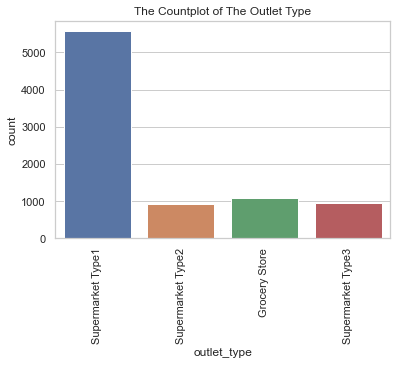

In [157]:
#Plot the countplot of the outlet type feature.
sns.countplot(traindf['outlet_type'])
plt.title('The Countplot of The Outlet Type')
plt.xticks(rotation=90)          
plt.show()

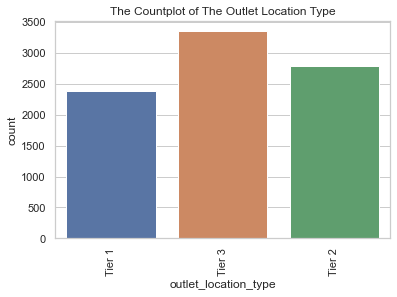

In [158]:
#Plot the countplot of the outlet type feature.
sns.countplot(traindf['outlet_location_type'])
plt.title('The Countplot of The Outlet Location Type')
plt.xticks(rotation=90)          
plt.show()

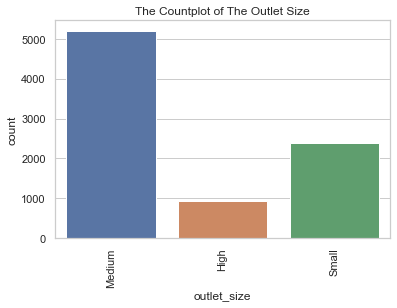

In [159]:
#Plot the countplot of the outlet size feature.
sns.countplot(traindf['outlet_size'])
plt.title('The Countplot of The Outlet Size')
plt.xticks(rotation=90)          
plt.show()

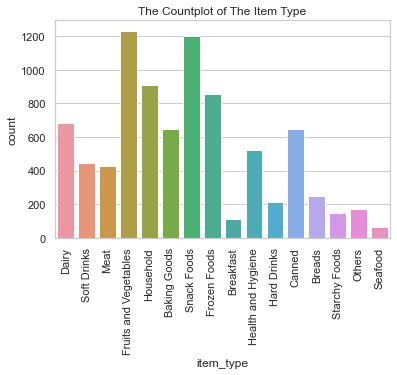

In [160]:
#Plot the countplot of the item type feature.
sns.countplot(traindf['item_type'])
plt.title('The Countplot of The Item Type')
plt.xticks(rotation=90)          
plt.show()

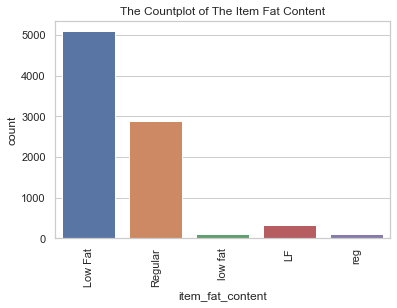

In [161]:
#Plot the countplot of the item fat content.
sns.countplot(traindf['item_fat_content'])
plt.title('The Countplot of The Item Fat Content')
plt.xticks(rotation=90)          
plt.show()

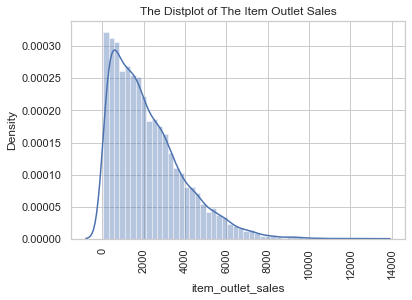

In [162]:
#Plot the distplot of the item outlet sales feature.
sns.distplot(traindf['item_outlet_sales'])
plt.title('The Distplot of The Item Outlet Sales')
plt.xticks(rotation=90)          
plt.show()

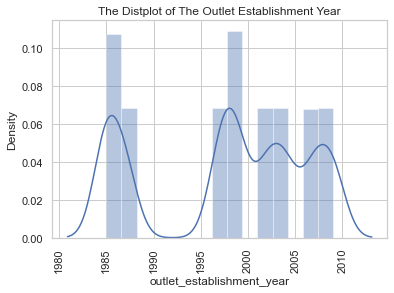

In [163]:
#Plot the distplot of the outlet establishment year feature.
sns.distplot(traindf['outlet_establishment_year'])
plt.title('The Distplot of The Outlet Establishment Year')
plt.xticks(rotation=90)          
plt.show()

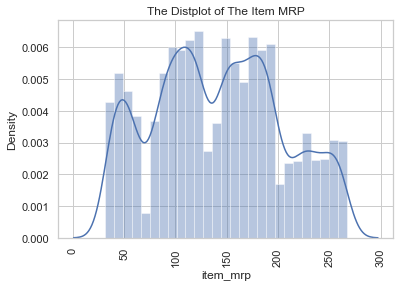

In [164]:
#Plot the distplot of the item mrp feature.
sns.distplot(traindf['item_mrp'])
plt.title('The Distplot of The Item MRP')
plt.xticks(rotation=90)          
plt.show()

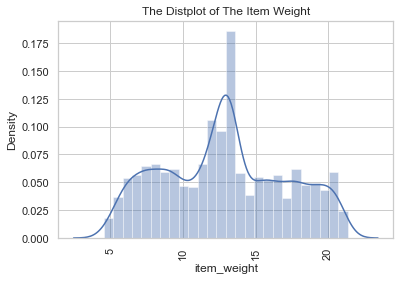

In [165]:
#Plot the distplot of the item weight feature.
sns.distplot(traindf['item_weight'])
plt.title('The Distplot of The Item Weight')
plt.xticks(rotation=90)          
plt.show()

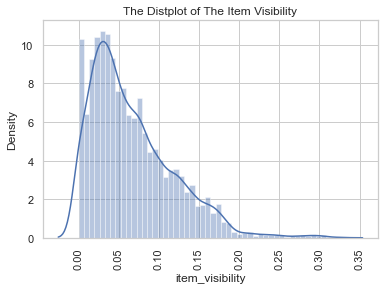

In [166]:
#Plot the distplot of the item visibility feature.
sns.distplot(traindf['item_visibility'])
plt.title('The Distplot of The Item Visibility')
plt.xticks(rotation=90)          
plt.show()

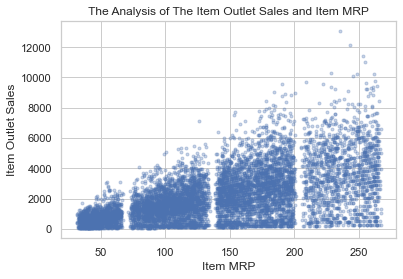

In [167]:
#Plot the item mrp and item outlet sales 
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title(" The Analysis of The Item Outlet Sales and Item MRP ")
plt.plot(traindf.item_mrp, traindf["item_outlet_sales"],'.', alpha = 0.3)

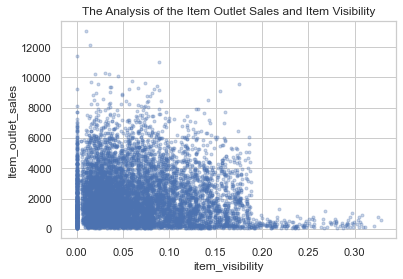

In [168]:
#Plot the item outlet sales and item visibility.
plt.xlabel("item_visibility")
plt.ylabel("Item_outlet_sales")
plt.title("The Analysis of the Item Outlet Sales and Item Visibility")
plt.plot(traindf.item_visibility, traindf["item_outlet_sales"],'.', alpha = 0.3)

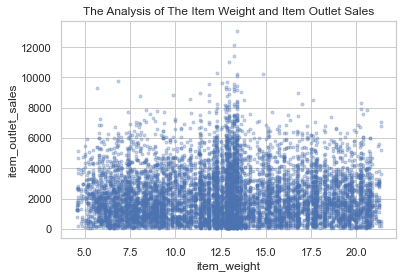

In [169]:
#Plot the item weight and the item outlet sales for analysis.
plt.xlabel("item_weight")
plt.ylabel("item_outlet_sales")
plt.title("The Analysis of The Item Weight and Item Outlet Sales")
plt.plot(traindf.item_weight, traindf["item_outlet_sales"],'.', alpha = 0.3)

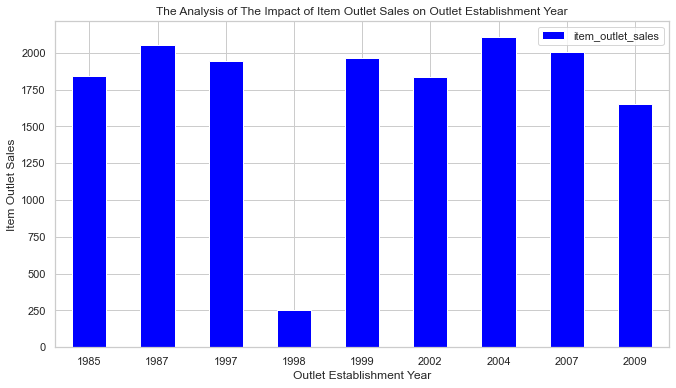

In [170]:
#Display the impact that the item outlet sales had on the  outlet establishment year.
outlet_establishment_year_pivot = traindf.pivot_table(index='outlet_establishment_year', values="item_outlet_sales", aggfunc=np.median)
outlet_establishment_year_pivot.plot(kind='bar', color='blue',figsize=(11, 6))
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Item Outlet Sales")
plt.title("The Analysis of The Impact of Item Outlet Sales on Outlet Establishment Year")
plt.xticks(rotation=0)
plt.show()

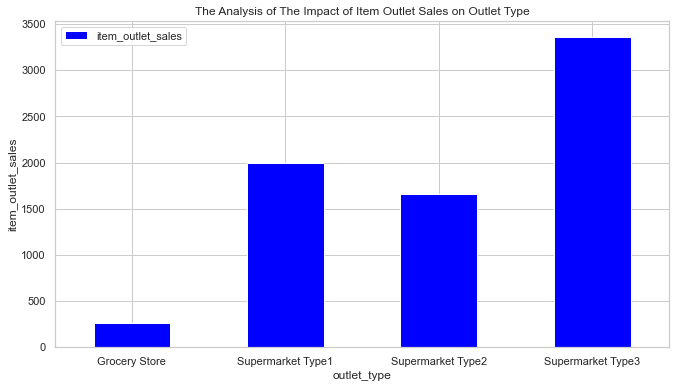

In [171]:
#Display the analysis of the impact of the outlet sales on outlet type.
outlet_type_pivot = traindf.pivot_table(index='outlet_type', values="item_outlet_sales", aggfunc=np.median)
outlet_type_pivot.plot(kind='bar', color='blue',figsize=(11,6))
plt.xlabel("outlet_type")
plt.ylabel("item_outlet_sales")
plt.title("The Analysis of The Impact of Item Outlet Sales on Outlet Type")
plt.xticks(rotation=0)
plt.show()

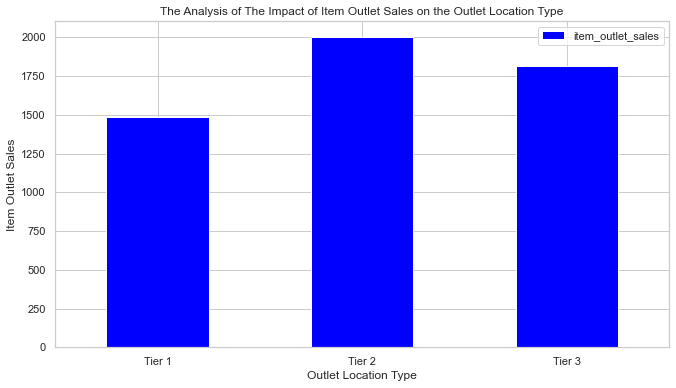

In [172]:
#Display the analysis of the impact of income outlet sales on outlet location type. 
outlet_location_type_pivot = traindf.pivot_table(index='outlet_location_type', values="item_outlet_sales", aggfunc=np.median)
outlet_location_type_pivot.plot(kind='bar', color='blue',figsize=(11,6))
plt.xlabel("Outlet Location Type")
plt.ylabel("Item Outlet Sales")
plt.title("The Analysis of The Impact of Item Outlet Sales on the Outlet Location Type")
plt.xticks(rotation=0)
plt.show()

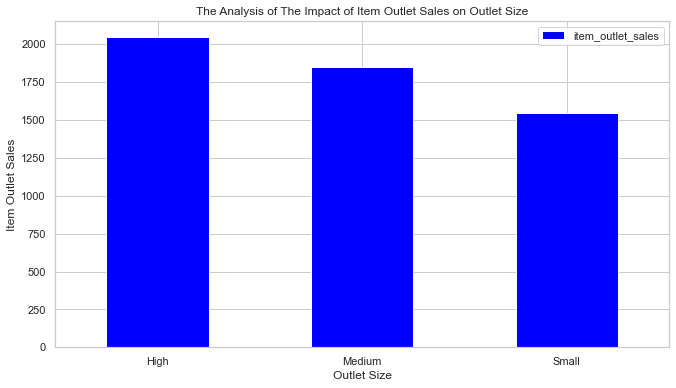

In [173]:
#Display the analysis of the impact of the item outlet sales on outlet size.
outlet_size_pivot = traindf.pivot_table(index='outlet_size', values="item_outlet_sales", aggfunc=np.median)
outlet_size_pivot.plot(kind='bar', color='blue',figsize=(11,6))

plt.xlabel("Outlet Size")
plt.ylabel("Item Outlet Sales")
plt.title("The Analysis of The Impact of Item Outlet Sales on Outlet Size")
plt.xticks(rotation=0)
plt.show()

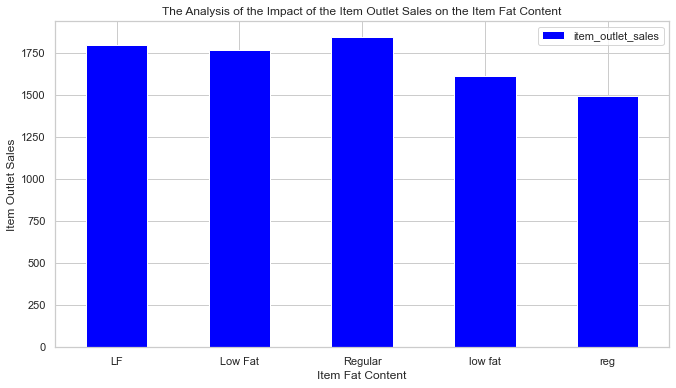

In [174]:
#Display the analysis of the impact of item outlet sales on item fat content.
item_fat_content_pivot = traindf.pivot_table(index='item_fat_content', values="item_outlet_sales", aggfunc=np.median)
item_fat_content_pivot.plot(kind='bar', color='blue',figsize=(11,6))

plt.xlabel("Item Fat Content")
plt.ylabel("Item Outlet Sales")
plt.title("The Analysis of the Impact of the Item Outlet Sales on the Item Fat Content")
plt.xticks(rotation=0)
plt.show()

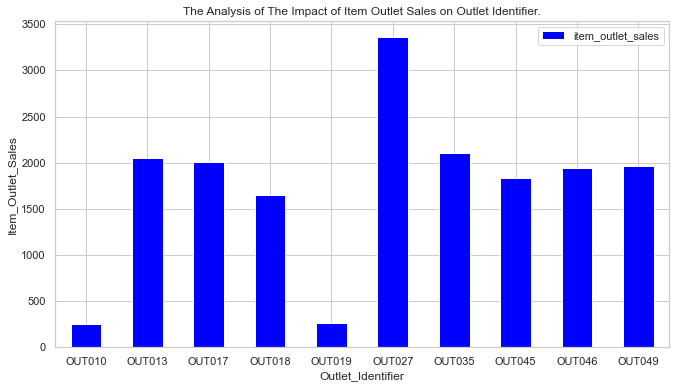

In [175]:
#Display the analysis of the impact of the item outlet sales on the outlet identifier.
outlet_identifier_pivot = traindf.pivot_table(index='outlet_identifier', values="item_outlet_sales", aggfunc=np.median)
outlet_identifier_pivot.plot(kind='bar', color='blue',figsize=(11,6))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("The Analysis of The Impact of Item Outlet Sales on Outlet Identifier.")
plt.xticks(rotation=0) 
plt.show()

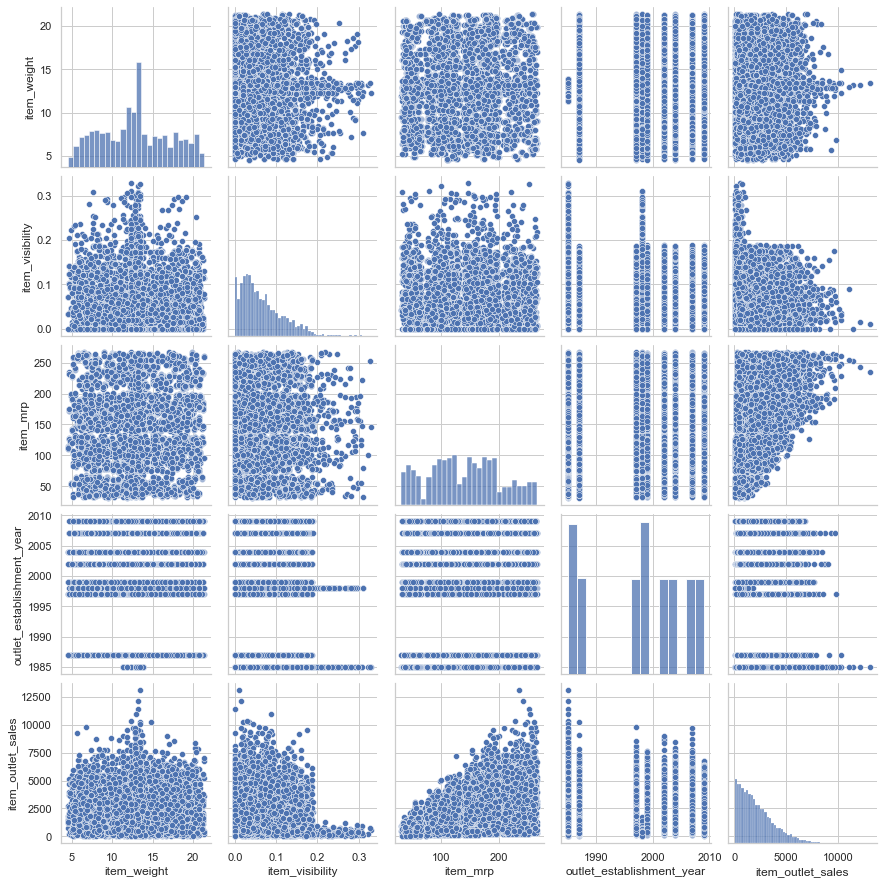

In [176]:
#Display the pairplot of the traindf dataframe.
sns.pairplot(traindf)

In [187]:
#Convert the columns into numeric form.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
traindf['item_identifier'] = le.fit_transform(traindf['item_identifier'])
traindf['item_weight'] = le.fit_transform(traindf['item_weight'])
traindf['item_fat_content'] = le.fit_transform(traindf['item_fat_content'])
traindf['item_visibility'] = le.fit_transform(traindf['item_visibility'])
traindf['item_type'] = le.fit_transform(traindf['item_type'])
traindf['item_mrp'] = le.fit_transform(traindf['item_mrp'])
traindf['outlet_identifier'] = le.fit_transform(traindf['outlet_identifier'])
traindf['outlet_establishment_year'] = le.fit_transform(traindf['outlet_establishment_year'])
traindf['outlet_size'] = le.fit_transform(traindf['outlet_size'])
traindf['outlet_location_type'] = le.fit_transform(traindf['outlet_location_type'])
traindf['outlet_type'] = le.fit_transform(traindf['outlet_type'])
traindf['item_outlet_sales'] = le.fit_transform(traindf['item_outlet_sales'])                                             
traindf.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,156,284,1,664,4,5592,9,4,1,0,1,2540
1,8,57,2,880,14,473,3,8,1,2,2,422
2,662,391,1,715,10,2901,9,4,1,0,1,1639
3,1121,408,2,0,6,4227,0,3,1,2,0,670
4,1297,265,1,0,9,627,1,1,0,2,1,865


<AxesSubplot:>

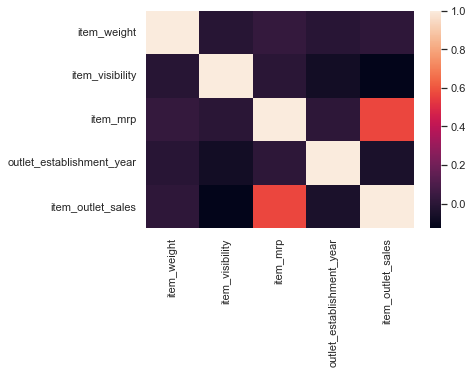

In [177]:
#Plot the correlation of the numeric columns within the dataframe. 
sns.heatmap(traindf.corr())

In [178]:
#The Model

In [179]:
BMdf = traindf.reset_index()

In [180]:
#The index needs to be reset and drop the item identifier column.
BMdf.drop('index', axis = 1, inplace = True)
BMdf.drop('item_identifier', axis = 1, inplace = True)

In [188]:
#Categorocal variables converted into dummy variables 
BMdf1=pd.get_dummies(BMdf,drop_first=True)

# Seperated the train and test from dataframe
train1=BMdf1[:BMdf1.shape[0]]
test1=testdf[testdf.shape[0]:]
BMdf1.head()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales,item_fat_content_Low Fat,item_fat_content_Regular,item_fat_content_low fat,item_fat_content_reg,item_type_Breads,...,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049,outlet_size_Medium,outlet_size_Small,outlet_location_type_Tier 2,outlet_location_type_Tier 3,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [189]:
#Display the validation size and seed.
validation_size = 0.20
seed = 7

In [190]:
# Use the split-out type of validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(traindf.values, traindf['item_outlet_sales'].values, test_size=validation_size, random_state=seed)

In [191]:
#Use standard scaling to fit the model.
#Standard scaling
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([80,82,84,85,90,91,92,94,95,150,200]))

In [192]:
#The GridSearchCV needs to be utilized to seek the best estimator & RMS (root mean square)to calculate score.
num_folds = 10
RMS = 'neg_mean_squared_error'
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation

In [193]:
#Display the mean test score results.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -43.323055 using {'n_estimators': 200}
-51.234186 (4.141885) with: {'n_estimators': 80}
-50.784895 (4.080098) with: {'n_estimators': 82}
-50.344291 (4.025789) with: {'n_estimators': 84}
-50.155851 (3.969136) with: {'n_estimators': 85}
-49.405760 (3.755032) with: {'n_estimators': 90}
-49.330617 (3.851460) with: {'n_estimators': 91}
-49.170391 (3.783962) with: {'n_estimators': 92}
-49.019193 (3.902931) with: {'n_estimators': 94}
-48.990893 (3.920689) with: {'n_estimators': 95}
-46.808444 (3.854575) with: {'n_estimators': 150}
-43.323055 (3.754444) with: {'n_estimators': 200}


In [194]:
#Ose StandardScaler to prepare the model.
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=30)
model.fit(rescaledX, Y_train)
# The valid dataset needs to be transformed.
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print("RMSE = ", mean_squared_error(Y_validation, predictions))

RMSE =  237.7863656123978


In [195]:
#The stanrdard type scaling of the traindf dataset
rescaled_traindf = scaler.transform(traindf)

In [196]:
#creating dataframe for the required output for submission file

submission = pd.DataFrame()
submission['item_identifier'] = traindf['item_identifier']
submission['outlet_identifier'] = traindf['outlet_identifier']

In [197]:
#Conduct the prediction on the train dataset
predicted_prices = model.predict(rescaled_traindf)

#Submission file preperation
submission['item_outlet_sales'] = predicted_prices
submission.to_csv('./submission_bigM.csv',index=False)
submission.head(10)

,item_identifier,outlet_identifier,item_outlet_sales
0,156,9,2522.776312
1,8,3,439.177044
2,662,9,1638.403723
3,1121,0,684.291626
4,1297,1,876.601458
5,758,3,539.370855
6,696,1,352.334185
7,738,5,2640.259917
8,440,7,941.288598
9,990,2,2889.805184
